### Notebook to explore supervised training of enc and dec alone

In [1]:
import numpy as np
import os, sys, shutil
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import json, pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from torch.utils.data import DataLoader
sys.path.insert(0, '../utils')
import data_utils, run_utils, eval_utils, models
import importlib

#### Encoder (e.g. supervsied seg)

In [5]:
'''
Quickly summarize trained models
'''
importlib.reload(eval_utils)
mods = eval_utils.get_netDF(modeldir='../../model_runs_enc/MURaM')
mods

net_name  n_classes channels  img_size  smooth_wght  chsn_wght  ncut_wght  \
0  encX_1A          3      [X]       128            1          1          1   

  padding_mode  kernel_size reconstruct_mag  ne  batch_size    lr     RMSE  \
0    replicate            3           False  15          16  0.01  0.51985   

   norm  
0  full

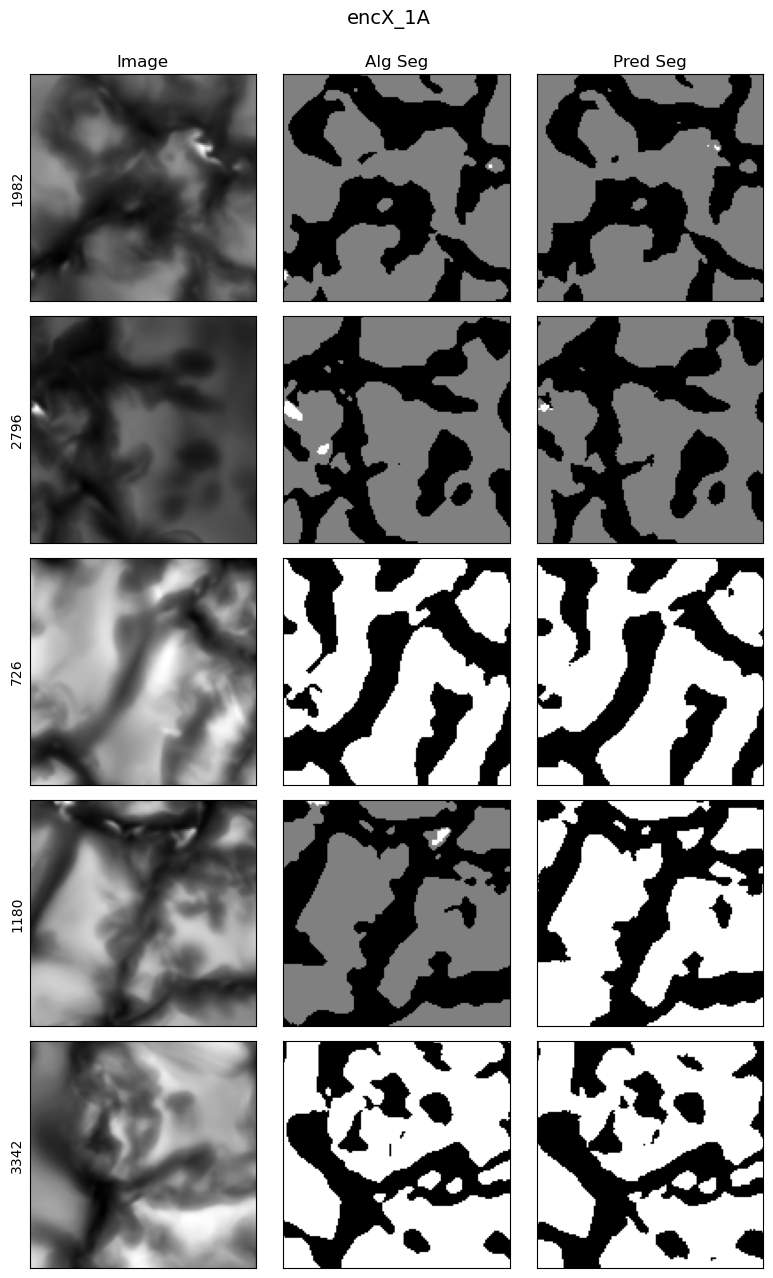

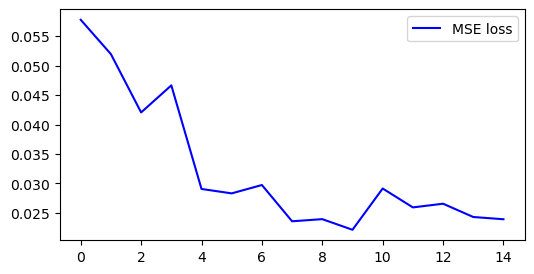

In [10]:
'''
Display a random sample of images for one model
'''
net_name = 'encX_1A' 
output_dir = f'../../model_runs_enc/MURaM/{net_name}/test_preds_MURaM'
fig, axs = plt.subplots(5, 3, figsize=(8, 13))
axs[0,0].set_title('Image')
axs[0,1].set_title('Alg Seg')
axs[0,2].set_title('Pred Seg')
target_pos = 2 if 'timeseries' in mods[mods['net_name']==f"{net_name}"] else 0
for i in range(5): 
    idx = np.random.randint(0, len([file for file in os.listdir(output_dir) if file.startswith('x')]))
    im = np.load(f'{output_dir}/x_{idx}.npy')[target_pos]
    true = np.argmax(np.load(f'{output_dir}/true_{idx}.npy'), axis=0)
    preds = np.argmax(np.load(f'{output_dir}/pred_{idx}.npy'), axis=0)
    axs[i,0].imshow(im, cmap='gist_gray'); axs[i,0].set_ylabel(idx)
    axs[i,1].imshow(true, cmap='gist_gray')
    axs[i,2].imshow(preds, cmap='gist_gray')
    axs[i,0].xaxis.set_tick_params(labelbottom=False); axs[i,0].yaxis.set_tick_params(labelleft=False); axs[i,0].set_xticks([]); axs[i,0].set_yticks([])
    axs[i,1].xaxis.set_tick_params(labelbottom=False); axs[i,1].yaxis.set_tick_params(labelleft=False); axs[i,1].set_xticks([]); axs[i,1].set_yticks([])
    axs[i,2].xaxis.set_tick_params(labelbottom=False); axs[i,2].yaxis.set_tick_params(labelleft=False); axs[i,2].set_xticks([]); axs[i,2].set_yticks([])
plt.suptitle(f'{net_name}\n', fontsize=14)
plt.tight_layout()
plt.savefig(f'{output_dir}/{net_name}_val_examples')

'''
Check losses
'''
losses = np.load(f'../../model_runs_enc/MURaM/{net_name}/losses.npy')
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(losses, color='b', label='MSE loss')
ax.legend()

In [ ]:
'''
Compare models 
'''
ts40idx = 108 # 58
ts80idx = 20 # FIND A GOOD ONE
nontsidx = 692 # 51, 131 # 161  # 131 # dont want to go through timeseries test sets to actually find the imageset that whose target image is idx 131 in the non-TS test set
ms = [m for m in mods['net_name']]# if m not in ignore] # [n.replace('WNet','') for n in mods['WNet_name']] # ['29nm','29nm_a','32nm','32nm_a','33nm','34nm','34nm_a'] # models on properly normalized data!
fig, axs = plt.subplots(len(ms)+1, 3, figsize=(9, 3*len(ms)))
for i in range(len(ms)):
    output_dir = f'../../model_runs_enc/MURaM/{ms[i]}/test_preds_MURaM'
    idx = ts40idx if 'T_1' in ms[i] else ts80idx if 'T_2' in ms[i] else nontsidx 
    im = np.load(f'{output_dir}/x_{idx}.npy')[0]
    true = np.load(f'{output_dir}/true_{idx}.npy')[0]
    preds = np.squeeze(np.load(f'{output_dir}/pred_{idx}.npy'))
    axs[i,1].set_title(f'{ms[i]}')
    axs[i,0].imshow(im, cmap='gist_gray')
    axs[i,1].imshow(true, cmap='gist_gray')
    axs[i,2].imshow(preds, cmap='gist_gray')#cmap='tab10')
    axs[i,0].xaxis.set_tick_params(labelbottom=False); axs[i,0].yaxis.set_tick_params(labelleft=False); axs[i,0].set_xticks([]); axs[i,0].set_yticks([])
    axs[i,1].xaxis.set_tick_params(labelbottom=False); axs[i,1].yaxis.set_tick_params(labelleft=False); axs[i,1].set_xticks([]); axs[i,1].set_yticks([])
    axs[i,2].xaxis.set_tick_params(labelbottom=False); axs[i,2].yaxis.set_tick_params(labelleft=False); axs[i,2].set_xticks([]); axs[i,2].set_yticks([])

#### Decoder

In [2]:
'''
Quickly summarize trained models
'''
importlib.reload(eval_utils)
mods = eval_utils.get_decDF(modeldir='../../model_runs_dec/MURaM')
mods

Skipping .ipynb_checkpoints; not finished training


net_name  n_classes              channels weights padding_mode  \
2       decX_1A          3                   [X]  [1, 1]    replicate   
1   decX_1A_new          3                   [X]     [1]    replicate   
3  decX_1Ab_new          3                   [X]     [1]    replicate   
0       decX_2A          3  [X, median_residual]  [1, 1]    replicate   

   kernel_size reconstruct_mag  ne  batch_size   lr      RMSE  norm  depth  \
2            3           False  10          16  0.1  0.710777  full    NaN   
1            3           False  10          16  0.1  0.084970  full    4.0   
3            3           False  10          16  0.1  0.083062  full    7.0   
0            3           False  10          16  0.1  0.399832  full    NaN   

  double  
2    NaN  
1    NaN  
3   True  
0    NaN

10


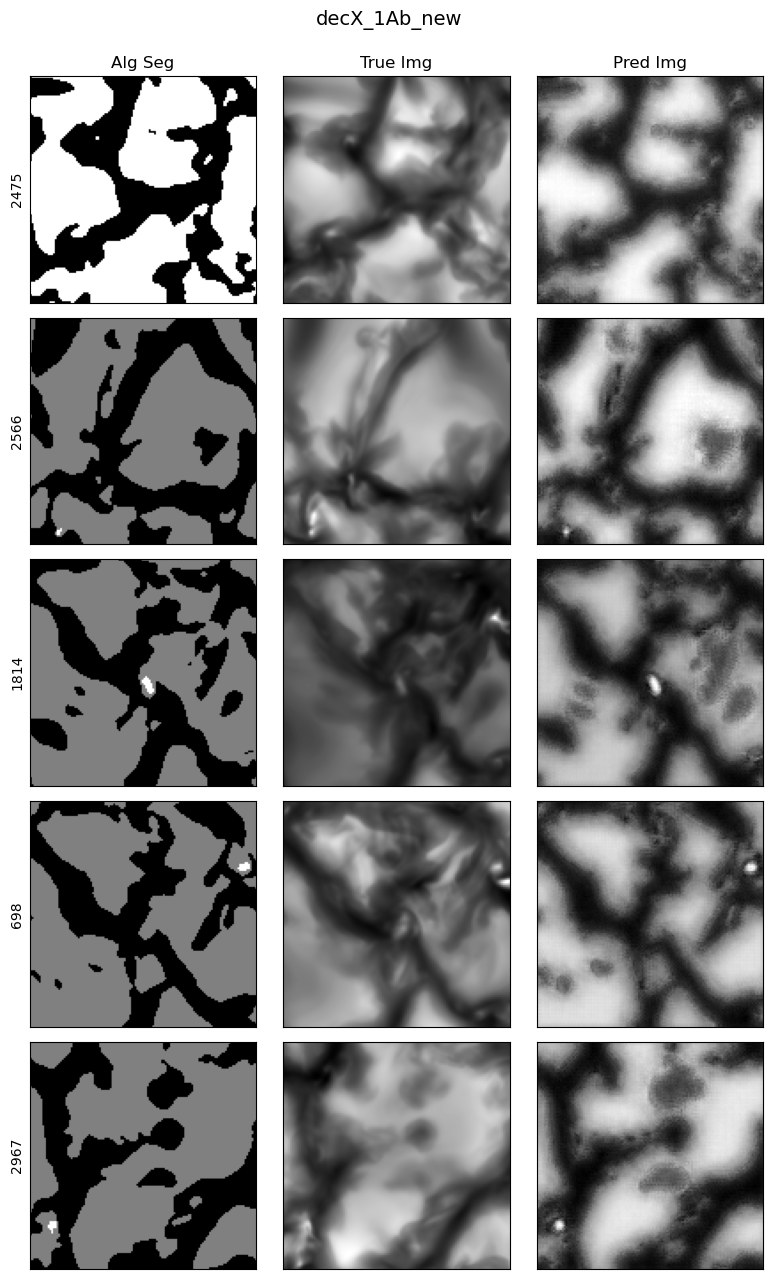

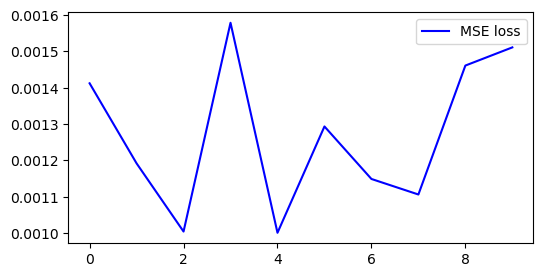

In [5]:
'''
Display a random sample of images for one model
'''

net_name = 'decX_1Ab_new' 
output_dir = f'../../model_runs_dec/MURaM/{net_name}/test_preds_MURaM'
fig, axs = plt.subplots(5, 3, figsize=(8, 13))
axs[0,0].set_title('Alg Seg')
axs[0,1].set_title('True Img')
axs[0,2].set_title('Pred Img')
for i in range(5): 
    idx = np.random.randint(0, len([file for file in os.listdir(output_dir) if file.startswith('x')]))
    algseg = np.argmax(np.load(f'{output_dir}/x_{idx}.npy'), axis=0)
    true = np.load(f'{output_dir}/true_{idx}.npy')[0]
    pred = np.load(f'{output_dir}/pred_{idx}.npy')[0]
    axs[i,0].imshow(algseg, cmap='gist_gray'); axs[i,0].set_ylabel(idx)
    axs[i,1].imshow(true, cmap='gist_gray')
    axs[i,2].imshow(pred, cmap='gist_gray')
    axs[i,0].xaxis.set_tick_params(labelbottom=False); axs[i,0].yaxis.set_tick_params(labelleft=False); axs[i,0].set_xticks([]); axs[i,0].set_yticks([])
    axs[i,1].xaxis.set_tick_params(labelbottom=False); axs[i,1].yaxis.set_tick_params(labelleft=False); axs[i,1].set_xticks([]); axs[i,1].set_yticks([])
    axs[i,2].xaxis.set_tick_params(labelbottom=False); axs[i,2].yaxis.set_tick_params(labelleft=False); axs[i,2].set_xticks([]); axs[i,2].set_yticks([])
plt.suptitle(f'{net_name}\n', fontsize=14)
plt.tight_layout()
plt.savefig(f'{output_dir}/{net_name}_val_examples')

'''
Check losses
'''
losses = np.load(f'../../model_runs_dec/MURaM/{net_name}/losses.npy')
print(len(losses))
fig, ax = plt.subplots(1,1,figsize=(6,3))
ax.plot(losses, color='b', label='MSE loss')
ax.legend()

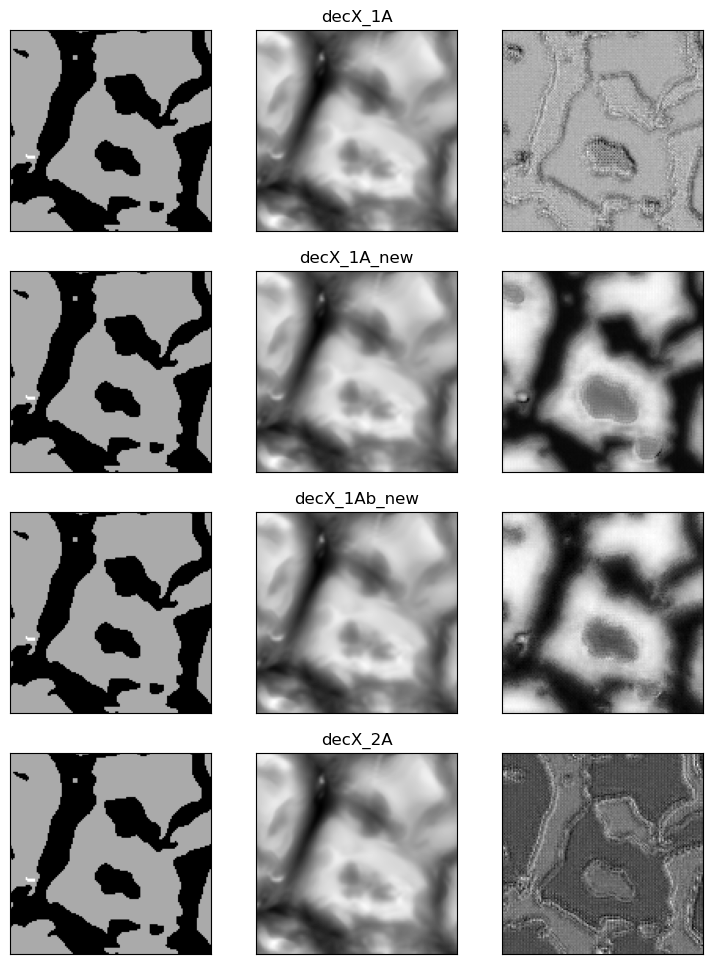

In [3]:
# '''
# Compare models 
# '''
# idx = 1382 #692 # 51, 131 # 161  # 131 # dont want to go through timeseries test sets to actually find the imageset that whose target image is idx 131 in the non-TS test set
# ms = [m for m in mods['net_name']]# if m not in ignore] # [n.replace('WNet','') for n in mods['WNet_name']] # ['29nm','29nm_a','32nm','32nm_a','33nm','34nm','34nm_a'] # models on properly normalized data!
# fig, axs = plt.subplots(len(ms), 3, figsize=(9, 3*len(ms)))
# for i in range(len(ms)):
#     output_dir = f'../../model_runs_dec/MURaM/{ms[i]}/test_preds_MURaM'
#     seg = eval_utils.onehot_to_map(np.load(f'{output_dir}/x_{idx}.npy'))
#     true = np.load(f'{output_dir}/true_{idx}.npy')[0] # [0] to take first out channel # preds = np.squeeze(np.load(f'{output_dir}/pred_{idx}.npy'))
#     preds = np.load(f'{output_dir}/pred_{idx}.npy')[0] 
#     axs[i,1].set_title(f'{ms[i]}')
#     axs[i,0].imshow(seg, cmap='gist_gray')
#     axs[i,1].imshow(true, cmap='gist_gray')
#     axs[i,2].imshow(preds, cmap='gist_gray')#cmap='tab10')
#     axs[i,0].xaxis.set_tick_params(labelbottom=False); axs[i,0].yaxis.set_tick_params(labelleft=False); axs[i,0].set_xticks([]); axs[i,0].set_yticks([])
#     axs[i,1].xaxis.set_tick_params(labelbottom=False); axs[i,1].yaxis.set_tick_params(labelleft=False); axs[i,1].set_xticks([]); axs[i,1].set_yticks([])
#     axs[i,2].xaxis.set_tick_params(labelbottom=False); axs[i,2].yaxis.set_tick_params(labelleft=False); axs[i,2].set_xticks([]); axs[i,2].set_yticks([])

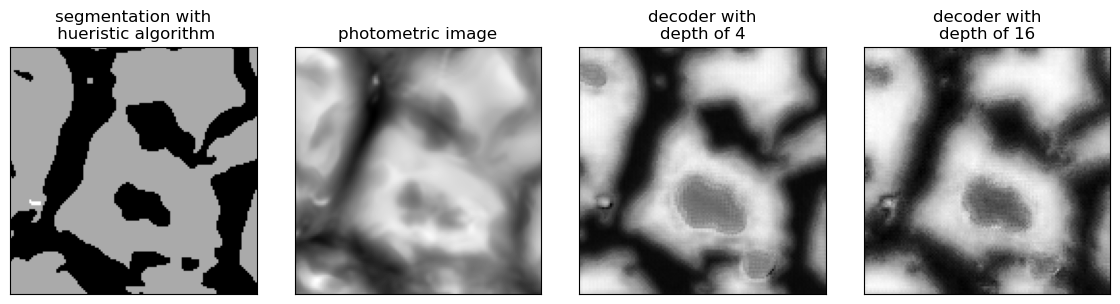

In [18]:
'''
Compare models 
'''
idx = 1382 #692 # 51, 131 # 161  # 131 # dont want to go through timeseries test sets to actually find the imageset that whose target image is idx 131 in the non-TS test set
ms = ['decX_1A_new', 'decX_1Ab_new']#[m for m in mods['net_name']]# if m not in ignore] # [n.replace('WNet','') for n in mods['WNet_name']] # ['29nm','29nm_a','32nm','32nm_a','33nm','34nm','34nm_a'] # models on properly normalized data!
descs = {'decX_1A':'decoder with\ndepth of 4',
         'decX_1A_new':'decoder with\ndepth of 4',
         'decX_1Ab_new':'decoder with\ndepth of 16',}
true = np.load(f'../../model_runs_dec/MURaM/{ms[0]}/test_preds_MURaM/true_{idx}.npy')[0] # [0] to take first out channel # preds = np.squeeze(np.load(f'{output_dir}/pred_{idx}.npy'))
seg = eval_utils.onehot_to_map(np.load(f'../../model_runs_dec/MURaM/{ms[0]}/test_preds_MURaM/x_{idx}.npy'))
fig, axs = plt.subplots(1, len(ms)+2, figsize=(3*(len(ms)+2), 3))
axs[0].imshow(seg, cmap='gist_gray'); axs[0].set_title('segmentation with\n hueristic algorithm')
axs[1].imshow(true, cmap='gist_gray'); axs[1].set_title('photometric image')
for i in range(len(ms)):
    output_dir = f'../../model_runs_dec/MURaM/{ms[i]}/test_preds_MURaM'
    preds = np.load(f'{output_dir}/pred_{idx}.npy')[0] 
    axs[i+2].set_title(f'{descs[ms[i]]}')
    axs[i+2].imshow(preds, cmap='gist_gray')#cmap='tab10')
for ax in axs:
    ax.xaxis.set_tick_params(labelbottom=False); ax.yaxis.set_tick_params(labelleft=False); ax.set_xticks([]); ax.set_yticks([])
plt.tight_layout()
plt.subplots_adjust(wspace=-0.1, hspace=0.0)

Experiment output dir /projects/lezu7058/SolarML_2023/Solar_Segmentation/analysis/../../model_runs_dec/MURaM/decX_1Ab_new/ already exists - contents will be overwritten
Copying exp dict into /projects/lezu7058/SolarML_2023/Solar_Segmentation/analysis/../../model_runs_dec/MURaM/decX_1Ab_new//exp_file.json
Loading data from UNetData_MURaM/seg_images/ and UNetData_MURaM/fullnorm_images/
Train data:
	11428 obs, broken into 715 batches
	Each batch has data of shape torch.Size([16, 3, 128, 128]), e.g. 16 images, [128, 128] pixels each, 3 layers (features)
	Each batch has labels of shape torch.Size([16, 1, 128, 128]), e.g. 16 images, [128, 128] pixels each, 1 layers (classes)


FileNotFoundError: [Errno 2] No such file or directory: '/projects/lezu7058/SolarML_2023/Solar_Segmentation/model_runs_dec/MURaM/decX_1Ab_new/traindata_decX_1Ab_new.png'

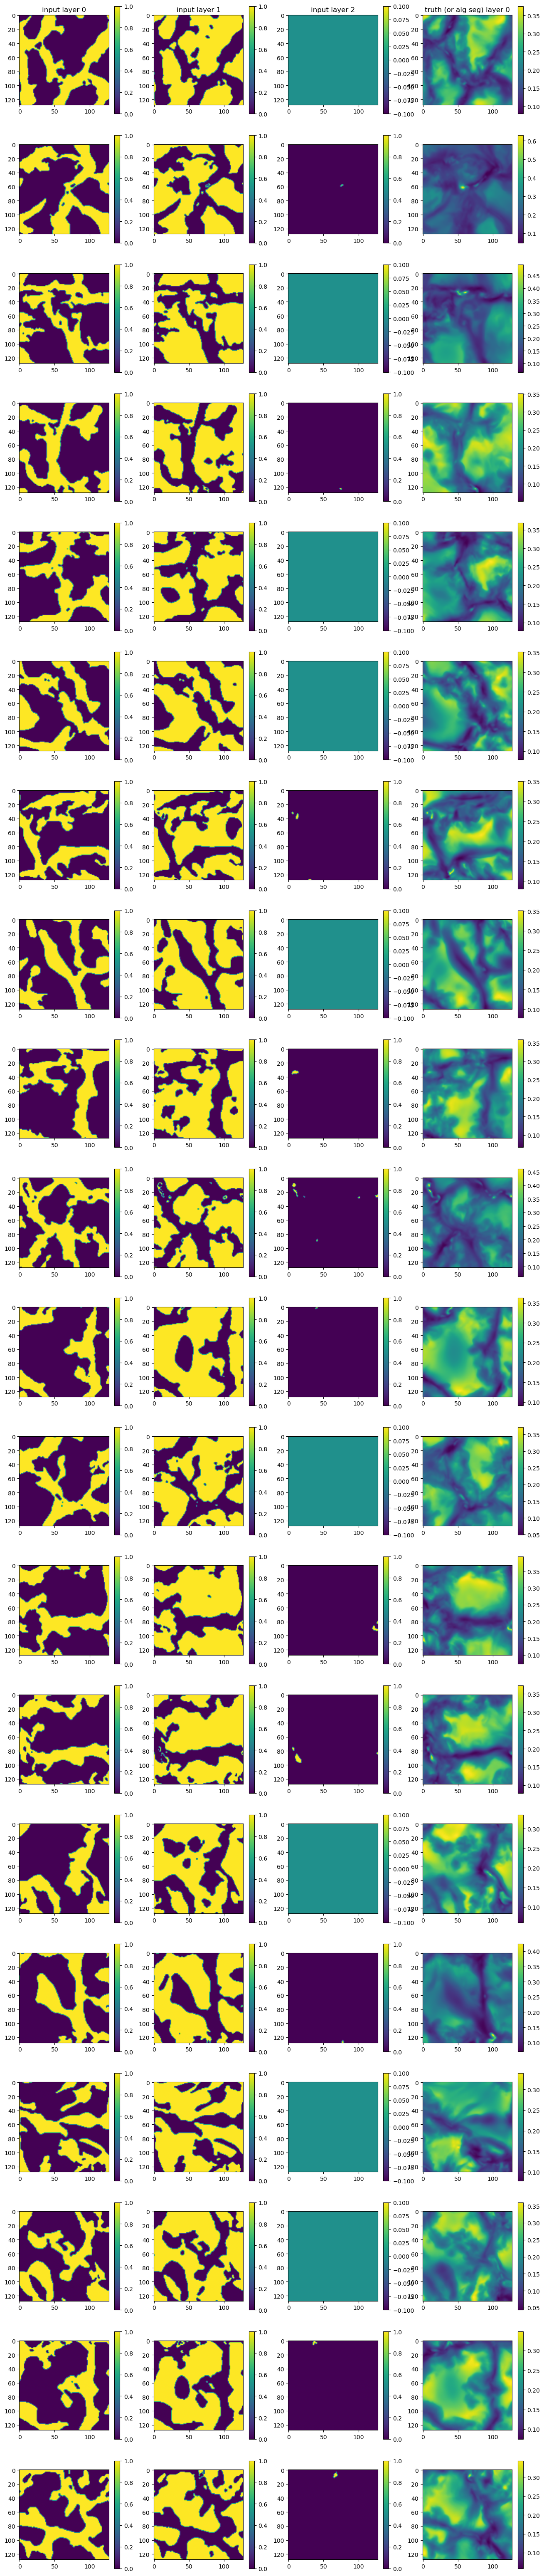

In [2]:
'''
Run UDec in notebook for debugging
'''
import sys, json, importlib
sys.path.insert(0, '../utils')
import data_utils, run_utils, models, loss_funcs
sys.path.insert(0, '../')
import run_udec
importlib.reload(data_utils); importlib.reload(run_udec); importlib.reload(loss_funcs)

d = json.load(open('../../Solar_Segmentation/exp_todo/udec_exp_file.json'))#'../../model_runs_seg/MURaM/WNetX_test/exp_file.json'))#'../../Solar_Segmentation/exp_todo/wnet_exp_file_10.json')) #'../../model_runs_seg/MURaM/WNetT_2C/exp_file.json')) # # '../../model_runs_seg/MURaM/WNetX_bin1A/exp_file.json'))#
run_udec.run_udec(d, gpu='False', test_only=False)

In [10]:
'''
Why is new "flexable" dec somehow different than original?
They look identical...
'''
importlib.reload(models)
train_ds = data_utils.dataset(image_dir='UNetData_MURaM/fullnorm_images/', mask_dir='UNetData_MURaM/seg_images/', set='train', norm=False, n_classes=3, channels=['X'], randomSharp=False, im_size=128, seg_as_input=True) # multichannel=True, channels=['deltaBinImg'], 
train_loader = DataLoader(train_ds, batch_size=16, pin_memory=True, shuffle=True)
X = next(iter(train_loader))[0][0,:,:,:].unsqueeze(0)
dec_old = models.UDec_old(n_classes=3, out_chans=1, ch_mul=64, kernel_size=3, padding=1, output_padding=1, padding_mode='replicate', reconstruct_mag=False)
print(X.shape)
preds = dec_old(X)
#plt.imshow(np.argmax(preds.detach().numpy(), axis=1)[0])

torch.Size([1, 3, 128, 128])
down 0 torch.Size([1, 64, 128, 128])
down 1 torch.Size([1, 128, 64, 64])
down 2 torch.Size([1, 256, 32, 32])
down 3 torch.Size([1, 512, 16, 16])
middle torch.Size([1, 1024, 8, 8])
dec0(up0) torch.Size([1, 512, 16, 16])
dec1(up1) torch.Size([1, 256, 32, 32])
dec2(up2) torch.Size([1, 128, 64, 64])
dec3(up3) torch.Size([1, 64, 128, 128])


In [27]:
importlib.reload(models)
dec_flex = models.UDec(n_classes=3, out_chans=1, depth=4, double=True, ch_mul=64, kernel_size=3, padding_mode='replicate', reconstruct_mag=False)
print(X.shape)
preds = dec_flex(X)
#plt.imshow(np.argmax(preds.detach().numpy(), axis=1)[0])

torch.Size([1, 3, 128, 128])
down0: torch.Size([1, 64, 128, 128])
down(pool) 1: torch.Size([1, 128, 64, 64])
down 2: torch.Size([1, 128, 64, 64])
down(pool) 3: torch.Size([1, 256, 32, 32])
down 4: torch.Size([1, 256, 32, 32])
down(pool) 5: torch.Size([1, 512, 16, 16])
down 6: torch.Size([1, 512, 16, 16])
middle torch.Size([1, 1024, 8, 8])
len(ups) 7
ups 0
  skip-1: torch.Size([1, 512, 16, 16])
  up0: torch.Size([1, 512, 16, 16])
  cat0: torch.Size([1, 1024, 16, 16])
  dec0: torch.Size([1, 512, 16, 16])
ups 1
  skip-2: torch.Size([1, 512, 16, 16])
  up1: torch.Size([1, 512, 16, 16])
  cat1: torch.Size([1, 1024, 16, 16])
  dec1: torch.Size([1, 512, 16, 16])
ups 2
  skip-3: torch.Size([1, 256, 32, 32])
  up2: torch.Size([1, 256, 32, 32])
  cat2: torch.Size([1, 512, 32, 32])
  dec2: torch.Size([1, 256, 32, 32])
ups 3
  skip-4: torch.Size([1, 256, 32, 32])
  up3: torch.Size([1, 256, 32, 32])
  cat3: torch.Size([1, 512, 32, 32])
  dec3: torch.Size([1, 256, 32, 32])
ups 4
  skip-5: torch.Size

In [26]:
print(dec_flex)

UDec(
  (downs): ModuleList(
    (0): Block(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=replicate)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=replicate)
      (batchnorm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (batchnorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): Block(
      (spatial1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, padding_mode=replicate)
      (depth1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), padding_mode=replicate)
      (spatial2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=128, padding_mode=replicate)
      (depth2): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), padding_mode=replicate)
      (batchnorm1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [28]:
dec_flex = models.UDec(n_classes=3, out_chans=1, depth=4, double=False, ch_mul=64, kernel_size=3, padding_mode='replicate', reconstruct_mag=False)
preds = dec_flex(X)
print(dec_flex)

down0: torch.Size([1, 64, 128, 128])
down(pool) 1: torch.Size([1, 128, 64, 64])
down(pool) 2: torch.Size([1, 256, 32, 32])
down(pool) 3: torch.Size([1, 512, 16, 16])
middle torch.Size([1, 1024, 8, 8])
len(ups) 4
ups 0
  skip-1: torch.Size([1, 512, 16, 16])
  up0: torch.Size([1, 512, 16, 16])
  cat0: torch.Size([1, 1024, 16, 16])
  dec0: torch.Size([1, 512, 16, 16])
ups 1
  skip-2: torch.Size([1, 256, 32, 32])
  up1: torch.Size([1, 256, 32, 32])
  cat1: torch.Size([1, 512, 32, 32])
  dec1: torch.Size([1, 256, 32, 32])
ups 2
  skip-3: torch.Size([1, 128, 64, 64])
  up2: torch.Size([1, 128, 64, 64])
  cat2: torch.Size([1, 256, 64, 64])
  dec2: torch.Size([1, 128, 64, 64])
ups 3
  skip-4: torch.Size([1, 64, 128, 128])
  up3: torch.Size([1, 64, 128, 128])
  cat3: torch.Size([1, 128, 128, 128])
  dec3: torch.Size([1, 64, 128, 128])
UDec(
  (downs): ModuleList(
    (0): Block(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=replicate)
      (conv2)

In [44]:
'''
Which layers change pixel dims? 
- pooling and conv transpose layers
'''
import torch
import torch.nn as nn 
import torch.nn.functional as F

down1 = Block(64, 128, padding_mode='replicate')

X1 = torch.rand(1, 64, 128, 128)
print(X1.shape)
pool1 = F.max_pool2d(X1, (2,2))
out1 = down1(pool1)
print(pool1.shape, out1.shape)

A = torch.rand(1, 512, 16, 16)
conv = nn.ConvTranspose2d(512, 512, kernel_size=3, stride=2, padding=1, output_padding=1)
out = conv(A)
out.shape


torch.Size([1, 64, 128, 128])
torch.Size([1, 64, 64, 64]) torch.Size([1, 128, 64, 64])
